In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import sympy as sym
import warnings
from IPython.display import display, Math
from numpy.lib.scimath import sqrt as csqrt

In [2]:
def f(x):
    return np.cos(2*np.pi*x/21) + 0.2*(-1)**x

Text(0.5, 1.0, 'Block of X')

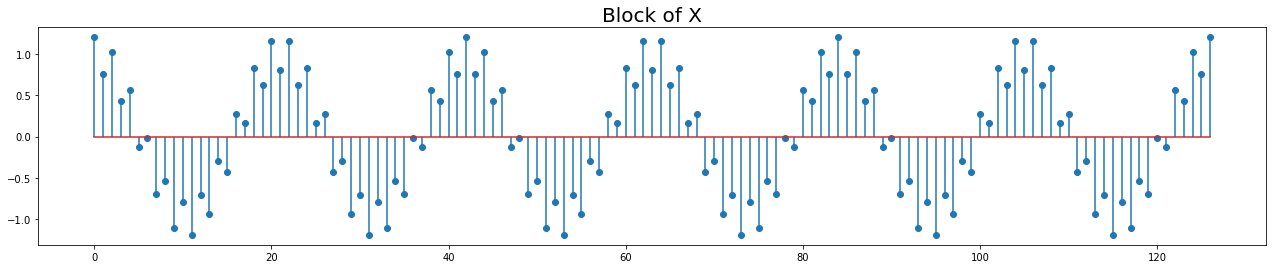

In [4]:
# Function definition

X = np.arange(0,5096)
M = 128 # Block size
Y = f(X)

# Plotting one block of X
plt.figure(figsize=(22,4))
plt.stem(Y[0:M-1])
plt.title("Block of X", fontsize=20)

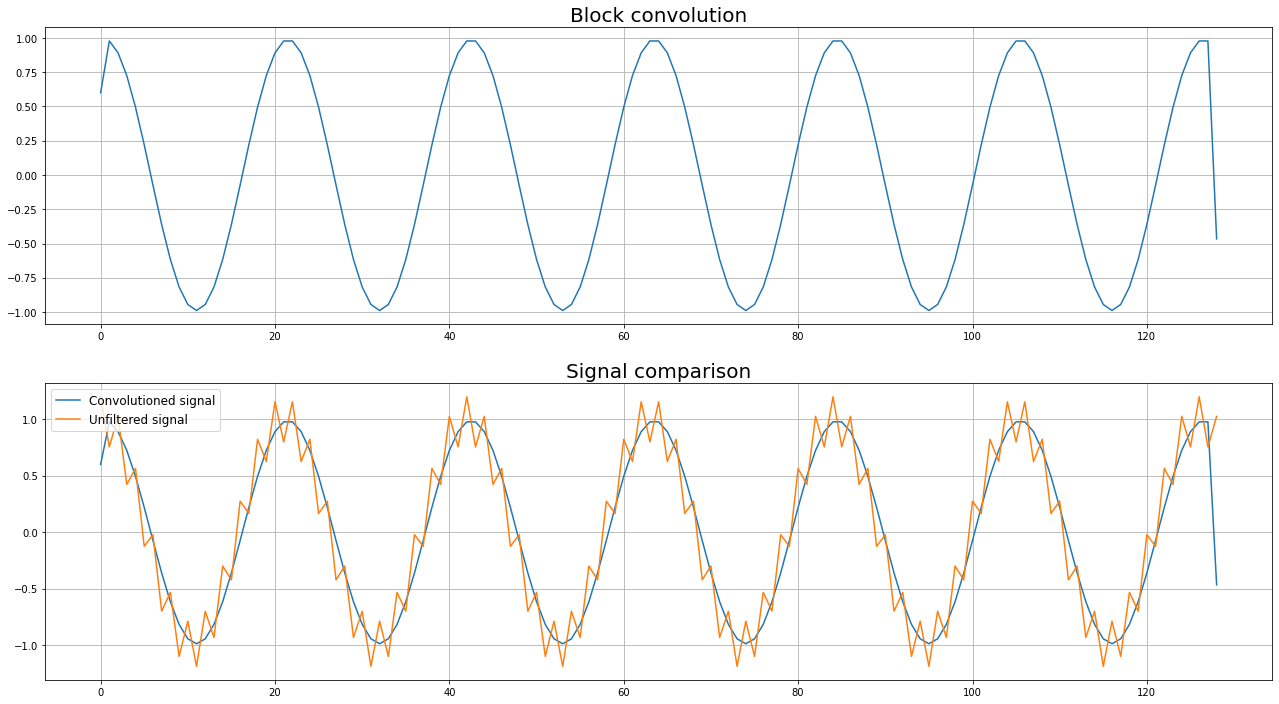

In [21]:
# Convolution between block of X and h

h = [1/2 , 1/2]
y = np.zeros(M+np.size(h)-1)

for i in range(np.size(h)-1):
    for j in range(i+1):
        y[i] = y[i] + h[j]*Y[i-j]

for i in range(M-np.size(h)+1):
    for j in range(np.size(h)):
        y[i+np.size(h)-1] = y[i+np.size(h)-1] + h[-j-1]*Y[j+i]

for i in range(np.size(h)-1):
    for j in range(np.size(h)-i-1):
        y[i+M] = y[i+M] + h[j+i+1]*Y[-j-1]

figure, ax = plt.subplots(2,1,figsize=(22,12))
ax[0].plot(np.arange(0,M+np.size(h)-1),y)
ax[0].set_title("Block convolution",fontsize=20)
ax[0].grid(True)

ax[1].plot(np.arange(0,M+np.size(h)-1),y, label="Convolutioned signal")
ax[1].plot(np.arange(0,M+np.size(h)-1),Y[0:M+np.size(h)-1], label="Unfiltered signal")
ax[1].set_title("Signal comparison",fontsize=20)
ax[1].legend(fontsize=12)
ax[1].grid(True)
